# Regularization

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers

from sklearn.preprocessing import StandardScaler
import tensorflow.keras.backend as K

In [12]:
area = np.array([68.9, 40.5, 33.42, 73, 74.11, 76, 61.51, 52, 70, 76.6, 20, 32, 58, 45, 27, 33], np.float64)
price = np.array([720, 520, 420, 955, 785, 897, 830, 670, 900, 885, 480, 620, 860, 550, 290, 320], np.float64)

scaler_area = StandardScaler()
area_scaled = scaler_area.fit_transform(area.reshape(area.shape[0],1))

scaler_price = StandardScaler()
price_scaled = scaler_price.fit_transform(price.reshape(price.shape[0],1))

tf.reset_default_graph()
K.clear_session()
tf.set_random_seed(42)
np.random.seed(42)

def train_network(l2_reg):
    model = tf.keras.models.Sequential()

    # add first hidden layer, which needs input shape as argument
    model.add(layers.Dense(50, input_shape = (1,), activation='tanh', kernel_initializer='normal',kernel_regularizer=regularizers.l2(l2_reg)))  
    
    # add uotput layer
    model.add(layers.Dense(1, activation=None ,kernel_initializer = 'normal'))
    
    model.compile(optimizer= optimizers.Adam(lr = 0.1) , loss='mse')
    model.fit(area_scaled, price_scaled, epochs = 3000)
    return model


In [13]:
from IPython.display import clear_output

# train models
print("Model 1:")
model1 = train_network(0)
clear_output()

print("Model 2:")
model2 = train_network(0.05)
clear_output()

print("Done!")

# do Predictions
x = np.arange(20,80,0.01)
x_scaled = scaler_area.transform(x.reshape(x.shape[0],1))

p1_scaled = model1.predict(x_scaled)
p2_scaled = model2.predict(x_scaled)

p1 = scaler_price.inverse_transform(p1_scaled)
p2 = scaler_price.inverse_transform(p2_scaled)

p1.flatten()
p2.flatten();

Done!


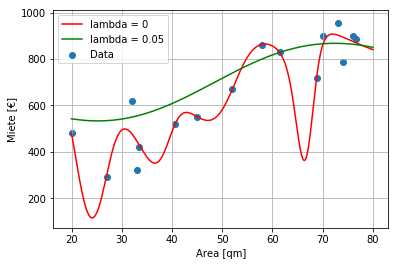

In [14]:
# Visualisierung

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,p1, color = 'r', label = 'lambda = 0')
ax.plot(x,p2, color = 'g', label = 'lambda = 0.05')
ax.scatter(area,price,  label = 'Data')

ax.set_xlabel('Area [qm]')
ax.set_ylabel('Rent [€]')

ax.grid(True)
ax.legend();